In [14]:
from transformers import GPT2Tokenizer, GPT2Model
from torch import no_grad

In [15]:

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')

with torch.no_grad():
    output = model(**encoded_input)

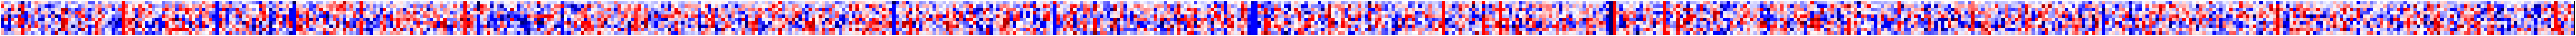

In [16]:
output.last_hidden_state.squeeze().chans(cmap="seismic", scale=10)

In [17]:
encoded_input.attention_mask,
encoded_input.input_ids

tensor[1, 10] i64 x∈[13, 5372] μ=1.484e+03 σ=1.686e+03 [[3041, 5372, 502, 416, 597, 2420, 345, 1549, 588, 13]]

In [18]:
tokenizer.convert_ids_to_tokens(encoded_input.input_ids[0])

['Re', 'place', 'Ġme', 'Ġby', 'Ġany', 'Ġtext', 'Ġyou', "'d", 'Ġlike', '.']

In [19]:
print(output.last_hidden_state)
print(output.past_key_values)

tensor[1, 10, 768] n=7680 (30Kb) x∈[-108.805, 251.208] μ=0.352 σ=8.384
((tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-5.076, 7.491] μ=0.042 σ=1.400, tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-1.230, 3.288] μ=0.008 σ=0.223), (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-4.423, 4.374] μ=-0.011 σ=1.104, tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-3.518, 4.125] μ=0.001 σ=0.450), (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-6.932, 6.622] μ=-0.029 σ=1.651, tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-4.390, 3.302] μ=-0.006 σ=0.523), (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-15.272, 14.330] μ=0.081 σ=3.270, tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-3.562, 3.961] μ=0.009 σ=0.551), (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-17.629, 15.324] μ=-0.127 σ=2.964, tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-3.001, 2.884] μ=-0.001 σ=0.579), (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-11.065, 9.860] μ=-0.002 σ=1.795, tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-3.125, 4.261] μ=0.036 σ=0.715), (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-11.773, 10.2

In [20]:
model.config

GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.33.2",
  "use_cache": true,
  "vocab_size": 50257
}

In [21]:
dict(output)

{'last_hidden_state': tensor[1, 10, 768] n=7680 (30Kb) x∈[-108.805, 251.208] μ=0.352 σ=8.384,
 'past_key_values': ((tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-5.076, 7.491] μ=0.042 σ=1.400,
   tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-1.230, 3.288] μ=0.008 σ=0.223),
  (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-4.423, 4.374] μ=-0.011 σ=1.104,
   tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-3.518, 4.125] μ=0.001 σ=0.450),
  (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-6.932, 6.622] μ=-0.029 σ=1.651,
   tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-4.390, 3.302] μ=-0.006 σ=0.523),
  (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-15.272, 14.330] μ=0.081 σ=3.270,
   tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-3.562, 3.961] μ=0.009 σ=0.551),
  (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-17.629, 15.324] μ=-0.127 σ=2.964,
   tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-3.001, 2.884] μ=-0.001 σ=0.579),
  (tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-11.065, 9.860] μ=-0.002 σ=1.795,
   tensor[1, 12, 10, 64] n=7680 (30Kb) x∈[-3.125, 4.261] 

In [22]:
model.config

GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.33.2",
  "use_cache": true,
  "vocab_size": 50257
}

In [23]:
output = model.forward(input_ids=encoded_input.input_ids, attention_mask=encoded_input.attention_mask, use_cache=False)
dict(output)

{'last_hidden_state': tensor[1, 10, 768] n=7680 (30Kb) x∈[-108.805, 251.208] μ=0.352 σ=8.384 grad ViewBackward0}

In [33]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')

In [36]:
generator.model.lm_head.weight

Parameter containing:
Parameter[50257, 768] n=38597376 (0.1Gb) x∈[-1.270, 1.785] μ=0.000 σ=0.144 grad

In [39]:
generator.model.transformer.wte.weight

Parameter containing:
Parameter[50257, 768] n=38597376 (0.1Gb) x∈[-1.270, 1.785] μ=0.000 σ=0.144 grad

In [55]:
generator("The capital of France is Paris. The capital of England is", num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The capital of France is Paris. The capital of England is London, while the capital of New York is Greenwich. London is the capital of the United States. It is also a major port for the United States. London is home to the capital of'},
 {'generated_text': 'The capital of France is Paris. The capital of England is London. And, as will be seen, we are not alone in our interest in the case of our national wealth.\n\n"In my country, which is not far from some of'},
 {'generated_text': 'The capital of France is Paris. The capital of England is Manchester."\n\nImage copyright PA Image caption Some residents complained that the electricity bill for the north-east was being increased for the past few years\n\nThe council in Toulouse -'},
 {'generated_text': 'The capital of France is Paris. The capital of England is London. The capital of Hungary is Budapest. The capital of Bulgaria is Bucharest. But if you want to be a Roman Catholic, just ask the Roman Catholic Church. T

In [66]:
?generator

Signature:      generator(text_inputs, **kwargs)
Type:           TextGenerationPipeline
String form:    <transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7f9ddb6e5300>
File:           ~/mambaforge/envs/torch/lib/python3.10/site-packages/transformers/pipelines/text_generation.py
Docstring:     
Language generation pipeline using any `ModelWithLMHead`. This pipeline predicts the words that will follow a
specified text prompt.

Example:

```python
>>> from transformers import pipeline

>>> generator = pipeline(model="gpt2")
>>> generator("I can't believe you did such a ", do_sample=False)
[{'generated_text': "I can't believe you did such a icky thing to me. I'm so sorry. I'm so sorry. I'm so sorry. I'm so sorry. I'm so sorry. I'm so sorry. I'm so sorry. I"}]

>>> # These parameters will return suggestions, and only the newly created text making it easier for prompting suggestions.
>>> outputs = generator("My tart needs some", num_return_sequences=4, return_full_te